# Concepts to Learn

# Boosting 
### **Adabost
### **GBM
### **XGBOOST

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import os
import pandas as pd
#os.chdir("")

# Read tennis.csv ,while reading it replace '?', ',' any other special character as NAs
# Check the dimensions and type

In [ ]:
data=pd.read_csv("./train_2.csv")
print(data.shape)
print(type(data))

(8001, 27)
<class 'pandas.core.frame.DataFrame'>


# Print Columns names and check the datatypes of columns(dtypes)

In [ ]:
print(data.columns)
print(data.dtypes)

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender', 'ID'],
      dtype='object')
rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline  

# Check the missing values 

In [ ]:
data.isnull().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


In [ ]:
data.dropna(inplace=True)

# Check the Frequency of Target Varaible(value_counts())

In [ ]:
data["outcome"].value_counts()

UE    3501
W     2682
FE    1818
Name: outcome, dtype: int64

# Drop Id column 

In [ ]:
data=data.set_index(["ID"])

In [ ]:
data.head(6)

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender
ID,,,,,,,,,,,,,,,,,,,,,
8644,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens
1182,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens
9042,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens
1222,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens
4085,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens
292,10,1,B,39.012186,0.349889,0.485098,3.264708,True,False,0.804337,...,2.077335,5.007207,13.4220,2.0316,True,F,0.533950,False,UE,mens


## Check the number of unique values in each column ; make necessary type conversion

In [ ]:
print(data.shape)
for i in data.columns:
  print(i,":",len(data[i].unique()))

(8001, 26)
rally : 30
serve : 2
hitpoint : 4
speed : 8001
net.clearance : 7994
distance.from.sideline : 8001
depth : 8001
outside.sideline : 2
outside.baseline : 2
player.distance.travelled : 7988
player.impact.depth : 7089
player.impact.distance.from.center : 6644
player.depth : 6882
player.distance.from.center : 5977
previous.speed : 8001
previous.net.clearance : 8001
previous.distance.from.sideline : 8001
previous.depth : 8001
opponent.depth : 6856
opponent.distance.from.center : 6775
same.side : 2
previous.hitpoint : 4
previous.time.to.net : 8001
server.is.impact.player : 2
outcome : 3
gender : 2


## Do necessary type conversions such as numeric to category(astype('category'))

In [ ]:
# identified the variables which has less than 10 unique values and cheked the type of value.
cat_cols=['serve','hitpoint','outside.sideline','outside.baseline','same.side','previous.hitpoint','server.is.impact.player','gender']
for i in cat_cols:
  data[i]=data[i].astype('str').astype('category')
data['outcome']=data['outcome'].astype('str').astype('category')
#bank[bank.select_dtypes(['object']).columns] = bank.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
for i in data.columns:
    if len(data[i].unique())<10:
        print(i,":",(data[i].unique()))

serve : ['1', '2']
Categories (2, object): ['1', '2']
hitpoint : ['B', 'F', 'U', 'V']
Categories (4, object): ['B', 'F', 'U', 'V']
outside.sideline : ['False', 'True']
Categories (2, object): ['False', 'True']
outside.baseline : ['False', 'True']
Categories (2, object): ['False', 'True']
same.side : ['True', 'False']
Categories (2, object): ['False', 'True']
previous.hitpoint : ['F', 'B', 'V', 'U']
Categories (4, object): ['B', 'F', 'U', 'V']
server.is.impact.player : ['False', 'True']
Categories (2, object): ['False', 'True']
outcome : ['UE', 'FE', 'W']
Categories (3, object): ['FE', 'UE', 'W']
gender : ['mens', 'womens']
Categories (2, object): ['mens', 'womens']


# Check the summary of dataframe(describe())

In [ ]:
data.describe(include='all')

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender
count,8001.000000,8001,8001,8001.000000,8001.000000,8001.000000,8001.000000,8001,8001,8001.000000,...,8001.000000,8001.000000,8001.000000,8001.000000,8001,8001,8001.000000,8001,8001,8001
unique,NaN,2,4,NaN,NaN,NaN,NaN,2,2,NaN,...,NaN,NaN,NaN,NaN,2,4,NaN,2,3,2
top,NaN,1,F,NaN,NaN,NaN,NaN,False,False,NaN,...,NaN,NaN,NaN,NaN,False,F,NaN,True,UE,mens
freq,NaN,4811,4402,NaN,NaN,NaN,NaN,6500,6380,NaN,...,NaN,NaN,NaN,NaN,6036,3684,NaN,4670,3501,4005
mean,5.966004,NaN,NaN,30.806938,0.629658,1.467630,4.421146,NaN,NaN,2.690463,...,2.193420,4.218717,12.616810,2.367952,NaN,NaN,0.549988,NaN,NaN,NaN
std,3.548182,NaN,NaN,7.298917,0.982504,1.108697,3.144965,NaN,NaN,1.713136,...,1.038942,2.052946,2.075401,1.313927,NaN,NaN,0.186788,NaN,NaN,NaN
min,3.000000,NaN,NaN,5.176078,-0.998184,0.000497,0.003135,NaN,NaN,0.000000,...,0.000164,0.000467,2.161200,0.000200,NaN,NaN,0.003201,NaN,NaN,NaN
25%,3.000000,NaN,NaN,26.770290,-0.027092,0.539500,1.641161,NaN,NaN,1.444233,...,1.354458,2.733674,12.082400,1.352200,NaN,NaN,0.432164,NaN,NaN,NaN
50%,5.000000,NaN,NaN,32.417690,0.445870,1.210847,3.860266,NaN,NaN,2.360894,...,2.168822,4.126864,12.901600,2.332000,NaN,NaN,0.507559,NaN,NaN,NaN
75%,7.000000,NaN,NaN,35.681431,0.970844,2.215955,7.029345,NaN,NaN,3.565853,...,3.022677,5.595515,13.712800,3.259000,NaN,NaN,0.624135,NaN,NaN,NaN


# Convert Categorical to dummies(pd.get_dummies)

In [ ]:
data_dummy=data.copy()
data_dummy.drop('outcome',axis=1,inplace=True)
data_dummy=pd.get_dummies(data_dummy)
data_dummy.dtypes

rally                                   int64
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
previous.time.to.net                  float64
serve_1                                 uint8
serve_2                                 uint8
hitpoint_B                              uint8
hitpoint_F                              uint8
hitpoint_U                        

In [ ]:
data_dummy.head(5)

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,same.side_False,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_U,previous.hitpoint_V,server.is.impact.player_False,server.is.impact.player_True,gender_mens,gender_womens
ID,,,,,,,,,,,,,,,,,,,,,
8644,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,0,1,0,1,0,0,1,0,1,0
1182,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,1,0,1,0,0,0,1,0,1,0
9042,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1,0,0,1,0,0,0,1,1,0
1222,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0,1,1,0,0,0,0,1,1,0
4085,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1,0,0,1,0,0,1,0,1,0


# SPLIT THE data in to train and test(use sklearn package)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide in to train and test
Y=data["outcome"] 
X=data_dummy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)  

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 37)
(1601, 37)
(6400,)
(1601,)


## Standardize the data (numerical attributes only)( import StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_atr=X_train.select_dtypes(['int64','float64']).columns

In [ ]:
num_atr

Index(['rally', 'speed', 'net.clearance', 'distance.from.sideline', 'depth',
       'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'previous.time.to.net'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_atr])

StandardScaler()

In [ ]:
X_train[num_atr]=scaler.transform(X_train[num_atr])
X_test[num_atr]=scaler.transform(X_test[num_atr])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6400, 37)
(1601, 37)


# Now It is time for Model BUilding 

## Build AdaBoost Classifier

In [ ]:
X_train.iloc[0]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoostClassifier()

In [ ]:
Adaboost_model = AdaBoostClassifier(n_estimators=200,
                                    learning_rate=1)
%time Adaboost_model.fit(X_train, y_train)

CPU times: user 5.58 s, sys: 51.1 ms, total: 5.63 s
Wall time: 5.61 s


AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred=Adaboost_model.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))

y_pred = Adaboost_model.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))


train accuracy: 0.85953125
test accuracy: 0.8400999375390381


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[169,  72,  14],
       [ 46, 351,  14],
       [ 10,  15, 288]])

# GridSearch with Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
Adaboost_model = AdaBoostClassifier()
 
# Use a grid over parameters of interest
param_grid = { 'learning_rate':[0.2,0.4,0.6],
                'n_estimators':[100,200,300,400]}
 
CV_ada = GridSearchCV(estimator=Adaboost_model, 
                      param_grid=param_grid, cv= 3)
%time CV_ada.fit(X=X_train, y=y_train)
print (CV_ada.best_score_, CV_ada.best_params_) 

CPU times: user 3min 2s, sys: 2.43 s, total: 3min 4s
Wall time: 3min 4s
0.8495311694232918 {'learning_rate': 0.4, 'n_estimators': 200}


In [ ]:
train_pred=CV_ada.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))
y_pred = CV_ada.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.86125
test accuracy: 0.8519675202998126


# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GradientBoostingClassifier()

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.3)
%time gbm.fit(X=X_train, y=y_train)

CPU times: user 13.4 s, sys: 23.4 ms, total: 13.5 s
Wall time: 13.4 s


GradientBoostingClassifier(learning_rate=0.3)

In [ ]:
train_pred=gbm.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))
y_pred = gbm.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.96296875
test accuracy: 0.8788257339163024


#### observation: differnce between train error and test error is huge; (Can we say This is overfitting; high varaince)
#### decrease the variance: play with different max_features,depth,subsample values

# Grid Search with cross validation

In [ ]:
GBM = GradientBoostingClassifier() 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200],
           "max_depth" : [2,3,5,7],
           "learning_rate" : [0.3,0.5],
}
CV_GBM = GridSearchCV(estimator=GBM,
                      param_grid=param_grid, cv= 3)
%time CV_GBM.fit(X=X_train, y=y_train)
print (CV_GBM.best_score_, CV_GBM.best_params_) 

KeyboardInterrupt: ignored

In [ ]:
train_pred=CV_GBM.predict(X_train)
print("train accuracy:",accuracy_score(y_train,train_pred))
y_pred = CV_GBM.predict(X_test)
print("test accuracy:",accuracy_score(y_test,y_pred))

train accuracy: 0.9665218502427805
test accuracy: 0.8733401430030644


# xgboost

#### for more info: 
    refer:
    https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
    http://zhanpengfang.github.io/418home.html

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_model=XGBClassifier(n_estimators=200)
xgb_model.fit(X_train,y_train)

XGBClassifier(n_estimators=200, objective='multi:softprob')

In [ ]:
trainpreds=xgb_model.predict(X_train)
print(accuracy_score(y_train,trainpreds))# accuracy
testpreds=xgb_model.predict(X_test)
print(accuracy_score(y_test,testpreds))# accuracy

0.9253125
0.8788257339163024


<Figure size 720x576 with 0 Axes>

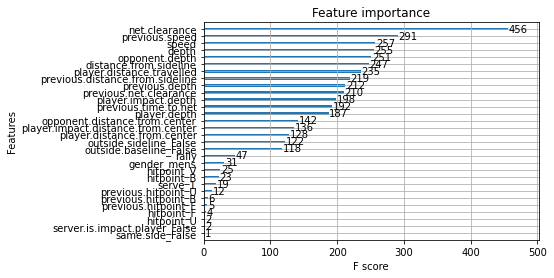

In [ ]:
from xgboost import plot_importance 
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plot_importance(xgb_model,height=0.3)

In [ ]:
xgb_model=XGBClassifier(verbosity=0)
param_grid = { 
           "n_estimators" : [100,150,200],
            "subsample" :   [0.5,0.7],
            "colsample_bytree" : [0.5,0.6,0.7],
            "max_depth" : [5,10],
           "learning_rate" : [0.1,0.5,0.9],
            
}
CV_XGBM = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv= 2)
%time CV_XGBM.fit(X=X_train, y=y_train)
#print (CV_XGBM.best_score_, CV_XGBM.best_params_) 

CPU times: user 5min 42s, sys: 2.37 s, total: 5min 45s
Wall time: 5min 43s


GridSearchCV(cv=2, estimator=XGBClassifier(verbosity=0),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7],
                         'learning_rate': [0.1, 0.5, 0.9], 'max_depth': [5, 10],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.5, 0.7]})

In [ ]:
trainpreds=CV_XGBM.predict(X_train)
print(accuracy_score(y_train,trainpreds))# accuracy

testpreds=CV_XGBM.predict(X_test)
print(accuracy_score(y_test,testpreds))# accuracy

1.0
0.8804902962206334


In [ ]:
CV_XGBM.best_estimator_

XGBClassifier(colsample_bytree=0.6, max_depth=10, n_estimators=200,
              objective='multi:softprob', subsample=0.7, verbosity=0)

In [ ]:
# change minimum loss reduction  
CV_XGBM.best_estimator_
m1=XGBClassifier(base_score=0.5, 
                 booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, 
              gamma=3,
              learning_rate=0.1, max_delta_step=0, 
              max_depth=5,
              min_child_weight=1, missing=None, 
              n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', 
              random_state=0,
              reg_alpha=0, reg_lambda=1, 
              scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, 
              verbosity=0)


m1.fit(X_train,y_train)
trainpreds=m1.predict(X_train)
print(accuracy_score(y_train,trainpreds))# accuracy

testpreds=m1.predict(X_test)
print(accuracy_score(y_test,testpreds))# accuracy

0.924865831842576
0.8825331971399387


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [41]:
import numpy as np
import statistics as stat

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()


model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_train)
pred2=model2.predict(X_train)
pred3=model3.predict(X_train)



testpred1=model1.predict(X_test)
testpred2=model2.predict(X_test)
testpred3=model3.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
stack_model_pred=pd.DataFrame({'DC':pred1,'KNN':pred2,'Logistic':pred3})
stack_model_testpred=pd.DataFrame({'DC':testpred1,'KNN':testpred2,'Logistic':testpred3})

In [43]:
for i in stack_model_pred.columns:
    stack_model_pred[i]=stack_model_pred[i].astype('str').astype('category')
    stack_model_testpred[i]=stack_model_testpred[i].astype('str').astype('category')
stack_model_pred_dummy=pd.get_dummies(stack_model_pred)
stack_model_pred_testdummy=pd.get_dummies(stack_model_testpred)

In [44]:
stack_model_pred.dtypes

DC          category
KNN         category
Logistic    category
dtype: object

In [45]:
stack_model_pred_dummy.head(1)

,DC_FE,DC_UE,DC_W,KNN_FE,KNN_UE,KNN_W,Logistic_FE,Logistic_UE,Logistic_W
0,0,1,0,0,1,0,0,1,0


## Buidling a meta classifier

In [46]:
metaclassifier=LogisticRegression()
metaclassifier.fit(stack_model_pred_dummy,y_train)

LogisticRegression()

In [47]:
train_pred = metaclassifier.predict(stack_model_pred_dummy)
print("train accuracy:",accuracy_score(y_train,train_pred))

#y_pred = metaclassifier.predict()
y_testpred = metaclassifier.predict(stack_model_pred_testdummy)
print("test accuracy:",accuracy_score(y_test,y_testpred))

train accuracy: 1.0
test accuracy: 0.8188632104934416


### ***Check the error for training and validation over the iterations

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train,y_train,eval_set=eval_set,verbose=True)

In [ ]:
# get the evaluation results of both training and testing sets
results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
epochs

200

#### ***plot the error of train and test(validation) over the iterations

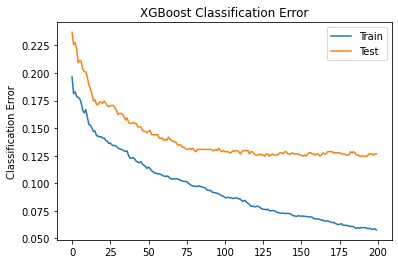

In [ ]:
from matplotlib  import pyplot
x_axis = range(0, epochs)
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

***observation: aftert 70 iterations there is not much decrease in test error and train is getting overfitted.
Is it really required to iterate for 200 iterations
    

### ***reduce the training time of xgboost-  early_stopping_rounds parameter 

In [ ]:
xgb_model.fit(X_train,y_train,eval_set=eval_set,early_stopping_rounds=10,verbose=True)

In [ ]:
trainpreds=xgb_model.predict(X_train)
print(accuracy_score(y_train,trainpreds))# accuracy
testpreds=xgb_model.predict(X_test)
print(accuracy_score(y_test,testpreds))# accuracy

0.9028878098645541
0.8712972420837589


In [ ]:
XGBClassifier()